In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

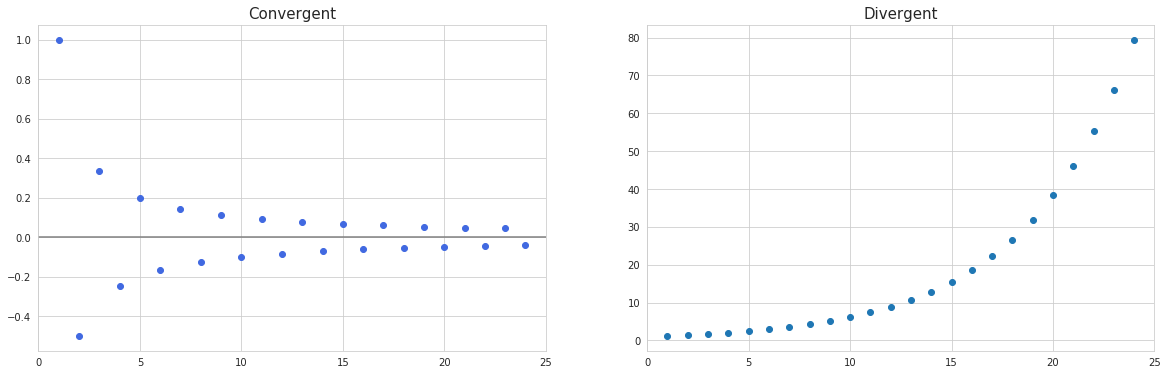

In [44]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(1, 2, figsize=(20,6))
    
x = np.arange(1, 25)
y1 = ((-1)**(x+1))/x

y2 = (1.2)**x

ax[0].plot([0, 25], [0, 0], color='grey')
ax[0].scatter(x, y1, color='royalblue')

ax[1].scatter(x, y2)

ax[0].set_title('Convergent', fontsize=15)
ax[1].set_title('Divergent', fontsize=15)

for ax in ax:
    ax.set_xlim(0, 25)
plt.savefig('../../assets/images/calculus/convergent_and_divergent_series.png', bbox_inches='tight');